# Deep Learning

## Réseaux de neurones

## Exercice 1 (MNIST avec Keras).

Exécutez les cellules suivantes et observez ce que vous obtenez.

In [38]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [39]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


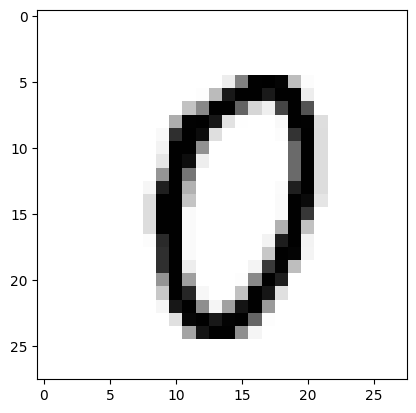

0


In [41]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
plt.imshow(X_train[1000], cmap=cm.Greys)
plt.show()

print(y_train[1000])

In [42]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

784


In [43]:
#Si vous travaillez avec tensorflow2, modifiez remplacez les deux lignes suivantes par ce qui suit :
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print (y_train.shape)

(60000, 10)


1. Expliquer, avec une figure, l’architecture du réseau.

2. Définir, dans le programme, l’architecture de votre réseau.

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model1= Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(10, activation='softmax',kernel_initializer='normal'))
model1.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

In [45]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2. Entrainer et tester le réseau. Changer d’algorithme d’optimisation, de pas d’apprentissage, etc.

In [46]:
epochs =20
batch_size= 32 #en fonction du gpu
model1.fit(X_train,y_train,
           validation_data=(X_test, y_test),
           epochs=epochs,
           batch_size=batch_size)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7775 - accuracy: 0.8171 - val_loss: 0.4825 - val_accuracy: 0.8801
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4585 - accuracy: 0.8798 - val_loss: 0.4010 - val_accuracy: 0.8949
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4052 - accuracy: 0.8908 - val_loss: 0.3681 - val_accuracy: 0.9021
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3784 - accuracy: 0.8962 - val_loss: 0.3491 - val_accuracy: 0.9073
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3614 - accuracy: 0.9005 - val_loss: 0.3362 - val_accuracy: 0.9099
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3495 - accuracy: 0.9030 - val_loss: 0.3271 - val_accuracy: 0.9125
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3404 - accuracy: 0.9055 - val_loss: 0.3209 - val_accuracy:

In [ ]:
model2= Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(10, activation='softmax',kernel_initializer='normal'))
model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

epochs =20
batch_size= 32 #en fonction du gpu
model2.fit(X_train,y_train,
           validation_data=(X_test, y_test),
           epochs=epochs,
           batch_size=batch_size)

4. Ajouter une couche cachée avec 10 neurones, puis avec 64 neurones.

In [ ]:
model3= Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(10, activation='relu',kernel_initializer='normal'))
model3.add(Dense(10, activation='softmax',kernel_initializer='normal'))
model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

epochs =20
batch_size= 32 #en fonction du gpu
model3.fit(X_train,y_train,
           validation_data=(X_test, y_test),
           epochs=epochs,
           batch_size=batch_size)

In [ ]:
model4= Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(64, activation='relu',kernel_initializer='normal'))
model4.add(Dense(10, activation='softmax',kernel_initializer='normal'))
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

epochs =20
batch_size= 32 #en fonction du gpu
model4.fit(X_train,y_train,
           validation_data=(X_test, y_test),
           epochs=epochs,
           batch_size=batch_size)

## Exercice 2 (MNIST avec CNN)

Exécutez les instructions suivantes. Prenez le temps de comprendre ce que fait chaqque cellule.

In [49]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [50]:
#On charge les bibliothèques :
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

1. Définir un réseau de neurones à convolution avec :

– une couche de convolution avec $32$ filters, chacun de taille $3\times 3$

– une couche de maxpooling (pool de taille $2\times 2$).

– un réseau "fully connected" à plusieurs couches

In [53]:
model5= Sequential()
model5.add(Conv2D(32,
                  kernel_size=(3,3), 
                  activation="relu",
                  input_shape=(28,28,1)))

model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Flatten())
model5.add(Dense(10, activation='softmax',kernel_initializer='normal'))
model5.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
epochs =20
batch_size= 32 #en fonction du gpu
model5.fit(X_train,y_train,
           validation_data=(X_test, y_test),
           epochs=epochs,
           batch_size=batch_size)

Epoch 1/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2188 - accuracy: 0.9374 - val_loss: 0.0835 - val_accuracy: 0.9747
Epoch 2/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0782 - accuracy: 0.9770 - val_loss: 0.0668 - val_accuracy: 0.9777
Epoch 3/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.0549 - val_accuracy: 0.9821
Epoch 4/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0588 - val_accuracy: 0.9822
Epoch 5/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.0511 - val_accuracy: 0.9831
Epoch 6/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0501 - val_accuracy: 0.9838
Epoch 7/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0484 -

2. Entrainer le modèle et le tester.

3. Choisir les bons hyper-paramètres pour atteindre une précision d’au moins 99%.